# RESEARCH Q1 : linear correlation between Vancouver temperature and sea level

In [1]:
import pandas as pd
import scipy.stats as stat
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [8]:
vantemp_df = pd.read_csv('../data/raw/VanHarbourCS_Temp_Monthly_1925_2007.csv')
vantemp_df = vantemp_df[(vantemp_df['Year'] >= 1950) & (vantemp_df['Year'] <= 2007)]
vantemp_df = vantemp_df[['Year', 'Month', 'Mean Temp (°C)']].dropna()
vantemp_df = vantemp_df.rename(columns={"Mean Temp (°C)": "Mean Temp"})

vansea_df = pd.read_csv('../data/raw/Van7735_SeaLevel_Daily_1950_2020.csv', skiprows=8, header=None, names=['Date', 'SLEV(metres)', 'Flag'])
vansea_df = vansea_df[['Date', 'SLEV(metres)']]
vansea_df['Date'] = pd.to_datetime(vansea_df['Date']) 
vansea_df = vansea_df[vansea_df['Date'].dt.year <= 2007]


In [9]:
#Merging both dfs into one
vansea_df['Year'] = vansea_df['Date'].dt.year
vansea_df['Month'] = vansea_df['Date'].dt.month
vanmonthly_sea = vansea_df.groupby(['Year', 'Month'], as_index=False)['SLEV(metres)'].mean()
vansea_temp = pd.merge(vantemp_df, vanmonthly_sea, on=['Year', 'Month'], how='inner')
vansea_temp = vansea_temp.rename(columns={"Mean Temp (°C)": "Mean Temp"})

In [36]:
#pearsonr test w/ pval and rsquared 
vanpearsonr = stat.pearsonr(vansea_temp['Mean Temp'], vansea_temp['SLEV(metres)'])
vanrsquared = vanpearsonr[0] ** 2
vanpval = vanpearsonr[1]
print(f'Pvalue for Vancouver is {vanpval}')

Pvalue for Vancouver is 1.819486218788655e-19


In [12]:
#linear regresssion model + equation
van_x = vansea_temp['Mean Temp']
van_y = vansea_temp['SLEV(metres)']
vanmodel = stat.linregress(van_x, van_y)
van_x_vals = np.linspace(van_x.min(), van_x.max(), 100)
van_y_vals = vanmodel[0] * van_x_vals + vanmodel[1]

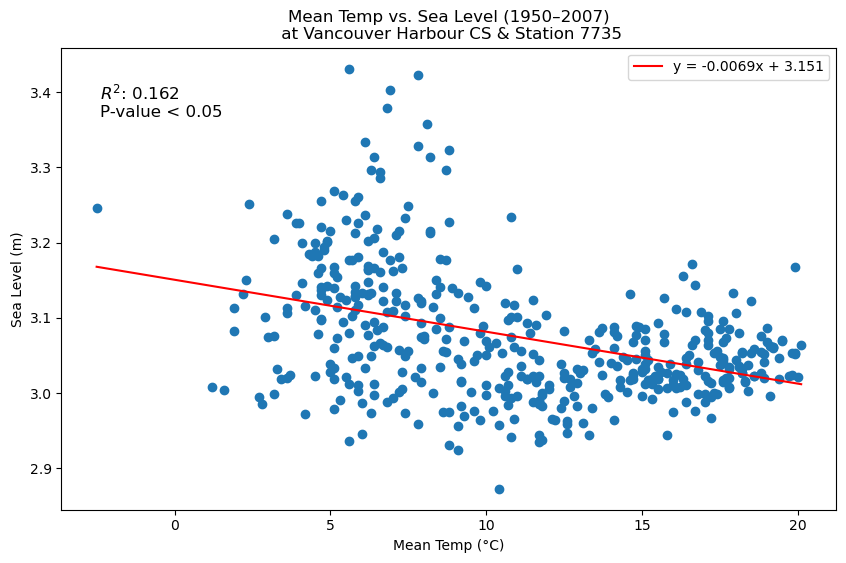

In [21]:
fig = plt.figure(figsize = (10,6))
plt.scatter(vansea_temp['Mean Temp'], vansea_temp['SLEV(metres)'], marker = 'o')
plt.plot(van_x_vals, van_y_vals, color='r', label = f"y = {vanmodel[0]:.4f}x + {vanmodel[1]:.3f}")

plt.annotate(f"$R^2$: {np.round(vanrsquared, 3)}\nP-value < 0.05",
             xy=(0.05, 0.85), xycoords='axes fraction', color='k', fontsize=12)

plt.title('Mean Temp vs. Sea Level (1950–2007)\n at Vancouver Harbour CS & Station 7735')
plt.xlabel('Mean Temp (°C)')
plt.ylabel('Sea Level (m)')
plt.legend()

# RESEARCH Q2 : linear correlation between St. John's temperature and sea level

In [22]:
sjtemp_df = pd.read_csv('../data/raw/StJohnA_Temp_Monthly_1942_2012.csv')
sjtemp_df = sjtemp_df[(sjtemp_df['Year'] >= 1950) & (sjtemp_df['Year'] <= 2007)]
sjtemp_df = sjtemp_df[['Year', 'Month', 'Mean Temp (°C)']].dropna()
sjtemp_df = sjtemp_df.rename(columns={"Mean Temp (°C)": "Mean Temp"})

sjsea_df = pd.read_csv('../data/raw/905-01-JAN-1950_slev.csv', skiprows=8, header=None, names=['Date', 'SLEV(metres)', 'Flag'])
sjsea_df = sjsea_df[['Date', 'SLEV(metres)']]
sjsea_df['Date'] = pd.to_datetime(sjsea_df['Date']) 
sjsea_df = sjsea_df[sjsea_df['Date'].dt.year <= 2007]

In [25]:
#Merging both dfs into one
sjsea_df['Year'] = sjsea_df['Date'].dt.year
sjsea_df['Month'] = sjsea_df['Date'].dt.month
sjmonthly_sea = vansea_df.groupby(['Year', 'Month'], as_index=False)['SLEV(metres)'].mean()
sj_seatemp = pd.merge(sjtemp_df, sjmonthly_sea, on=['Year', 'Month'], how='inner')
sj_seatemp = sj_seatemp.rename(columns={"Mean Temp (°C)": "Mean Temp"})

In [35]:
#pearsonr test w/ pval and rsquared 
sjpearsonr = stat.pearsonr(sj_seatemp['Mean Temp'], sj_seatemp['SLEV(metres)'])
sjrsquared = sjpearsonr[0] ** 2
sjpval = sjpearsonr[1]
print(f'Pvalue for Saint Johns is {sjpval}')

Pvalue for Saint Johns is 2.0232495944751122e-22


In [37]:
#linear regresssion model + equation
sj_x = sj_seatemp['Mean Temp']
sj_y = sj_seatemp['SLEV(metres)']
sjmodel = stat.linregress(sj_x, sj_y)
sj_x_vals = np.linspace(sj_x.min(), sj_x.max(), 100)
sj_y_vals = sjmodel[0] * sj_x_vals + sjmodel[1]

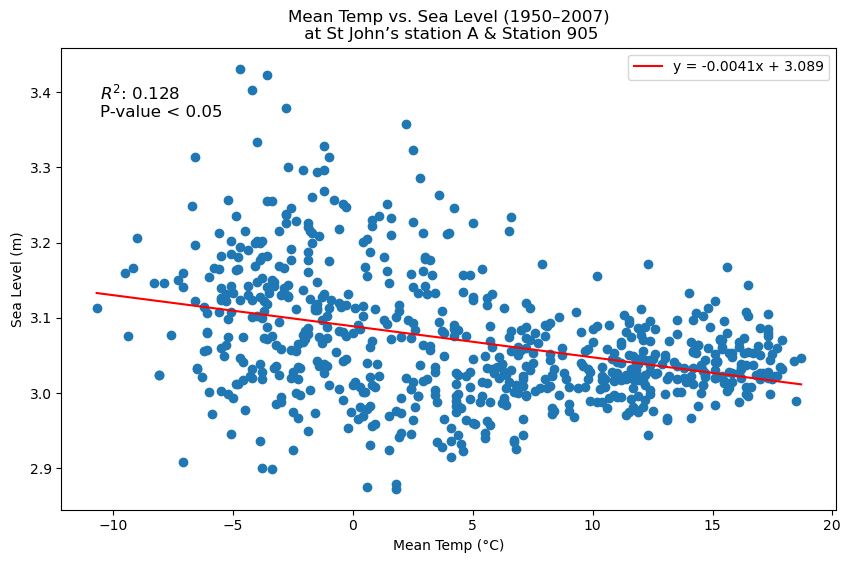

In [40]:
fig2 = plt.figure(figsize = (10,6))
plt.scatter(sj_seatemp['Mean Temp'], sj_seatemp['SLEV(metres)'], marker = 'o')
plt.plot(sj_x_vals, sj_y_vals, color='r', label = f"y = {sjmodel[0]:.4f}x + {sjmodel[1]:.3f}")

plt.annotate(f'$R^2$: {np.round(sjrsquared, 3)}\nP-value < 0.05',
             xy=(0.05, 0.85), xycoords='axes fraction', color='k', fontsize=12)

plt.title('Mean Temp vs. Sea Level (1950–2007)\n at St John’s station A & Station 905')
plt.xlabel('Mean Temp (°C)')
plt.ylabel('Sea Level (m)')
plt.legend()


# RESEARCH Q3 : linear correlation between Vancouver temperature and St John's temperature

In [41]:
sjvan_df = pd.merge(sjtemp_df, vantemp_df, on=['Year', 'Month'], how='inner')
sjvan_df = sjvan_df.rename(columns={"Mean Temp_x": "St. John Mean Temp"})
sjvan_df = sjvan_df.rename(columns={"Mean Temp_y": "Vancouver Mean Temp"})

In [42]:
sjvan_df.columns

Index(['Year', 'Month', 'St. John Mean Temp', 'Vancouver Mean Temp'], dtype='object')

In [46]:
sjvanpearsonr = stat.pearsonr(sjvan_df['Vancouver Mean Temp'], sjvan_df['St. John Mean Temp'])
sjvanrsquared = sjvanpearsonr[0] ** 2
sjvanpval = sjvanpearsonr[1]
print(f'Pvalue for Saint Johns vs Vancouver is {sjvanpval}')

Pvalue for Saint Johns vs Vancouver is 3.9764417142740106e-190


In [44]:
sjvan_x = sjvan_df['Vancouver Mean Temp']
sjvan_y = sjvan_df['St. John Mean Temp']
sjvanmodel = stat.linregress(sjvan_x, sjvan_y)
sjvan_x_vals = np.linspace(sjvan_x.min(), sjvan_x.max(), 100)
sjvan_y_vals = sjvanmodel[0] * sjvan_x_vals + sjvanmodel[1]

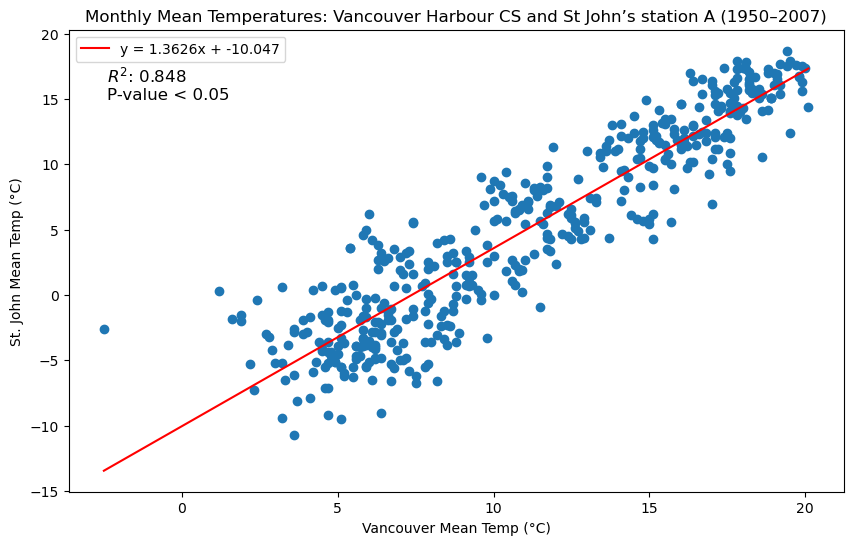

In [47]:
fig3 = plt.figure(figsize = (10,6))
plt.scatter(sjvan_df['Vancouver Mean Temp'], sjvan_df['St. John Mean Temp'], marker = 'o')
plt.plot(sjvan_x_vals, sjvan_y_vals, color='r', label = f"y = {sjvanmodel[0]:.4f}x + {sjvanmodel[1]:.3f}")

plt.annotate(f'$R^2$: {np.round(sjvanrsquared, 3)}\nP-value < 0.05',
             xy=(0.05, 0.85), xycoords='axes fraction', color='k', fontsize=12)

plt.title('Monthly Mean Temperatures: Vancouver Harbour CS and St John’s station A (1950–2007)')
plt.xlabel('Vancouver Mean Temp (°C)')
plt.ylabel('St. John Mean Temp (°C)')
plt.legend()
